In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [237]:
data = pd.read_csv('data.csv')

In [238]:
data.head()

id                                           title  \
0   1                                         Two Sum   
1   2                                 Add Two Numbers   
2   3  Longest Substring Without Repeating Characters   
3   4                     Median of Two Sorted Arrays   
4   5                   Longest Palindromic Substring   

                                         description  is_premium difficulty  \
0  Given an array of integers `nums` and an integ...           0       Easy   
1  You are given two non-empty linked lists repre...           0     Medium   
2  Given a string `s`, find the length of the lon...           0     Medium   
3  Given two sorted arrays `nums1` and `nums2` of...           0       Hard   
4  Given a string `s`, return the longest palindr...           0     Medium   

                                       solution_link  acceptance_rate  \
0                                  /articles/two-sum             46.7   
1                          /articles/add-two-numbers             35.7   
2  /articles/longest-substring-without-repeating-...             31.5   
3              /articles/median-of-two-sorted-arrays             31.4   
4            /articles/longest-palindromic-substring             30.6   

   frequency                                                url  \
0      100.0              https://leetcode.com/problems/two-sum   
1       93.1      https://leetcode.com/problems/add-two-numbers   
2       90.9  https://leetcode.com/problems/longest-substrin...   
3       86.2  https://leetcode.com/problems/median-of-two-so...   
4       84.7  https://leetcode.com/problems/longest-palindro...   

   discuss_count accepted submissions  \
0            999     4.1M        8.7M   
1            999     1.9M        5.2M   
2            999     2.1M        6.7M   
3            999   904.7K        2.9M   
4            999     1.3M        4.1M   

                                           companies  \
0  Amazon,Google,Apple,Adobe,Microsoft,Bloomberg,...   
1  Bloomberg,Microsoft,Amazon,Google,Facebook,App...   
2  Amazon,Bloomberg,Microsoft,Facebook,Apple,Adob...   
3  Amazon,Goldman Sachs,Facebook,Microsoft,Apple,...   
4  Amazon,Microsoft,Wayfair,Facebook,Adobe,eBay,G...   

                                  related_topics  likes  dislikes  rating  \
0                               Array,Hash Table  20217       712      97   
1                     Linked List,Math,Recursion  11350      2704      81   
2  Hash Table,Two Pointers,String,Sliding Window  13810       714      95   
3         Array,Binary Search,Divide and Conquer   9665      1486      87   
4                     String,Dynamic Programming  10271       670      94   

   asked_by_faang                                  similar_questions  
0               1  [3Sum, /problems/3sum/, Medium], [4Sum, /probl...  
1               1  [Multiply Strings, /problems/multiply-strings/...  
2               1  [Longest Substring with At Most Two Distinct C...  
3               1                                                NaN  
4               1  [Shortest Palindrome, /problems/shortest-palin...

In [214]:
# Group the data by difficulty and calculate the mean acceptance rate
avg_acceptance = data.groupby('difficulty')['acceptance_rate'].mean()

# Sort the values in descending order
avg_acceptance = avg_acceptance.sort_values(ascending=False)

# Print the results
print(avg_acceptance)


difficulty
Easy      61.201677
Medium    52.555348
Hard      44.612468
Name: acceptance_rate, dtype: float64


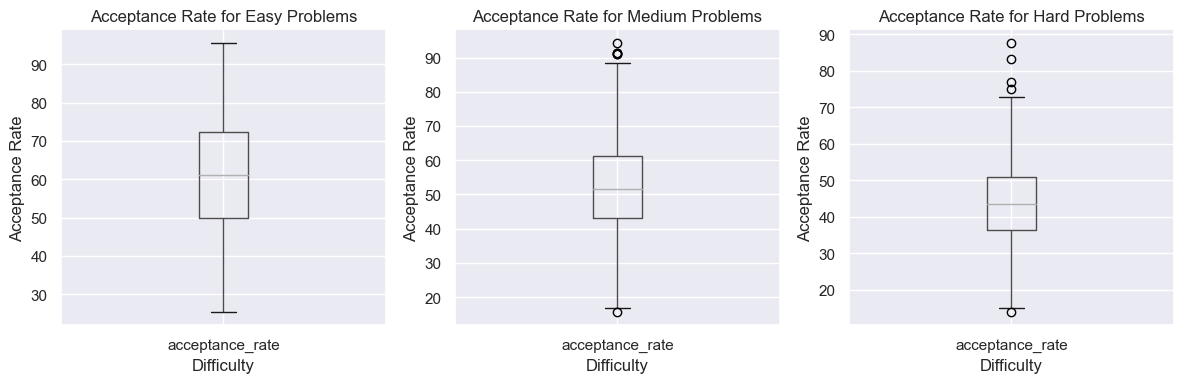

In [215]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Create box plots for easy difficulty
easy_data = data[data['difficulty'] == 'Easy']
easy_data.boxplot(column='acceptance_rate', ax=axes[0])
axes[0].set_title('Acceptance Rate for Easy Problems')

# Create box plots for medium difficulty
medium_data = data[data['difficulty'] == 'Medium']
medium_data.boxplot(column='acceptance_rate', ax=axes[1])
axes[1].set_title('Acceptance Rate for Medium Problems')

# Create box plots for hard difficulty
hard_data = data[data['difficulty'] == 'Hard']
hard_data.boxplot(column='acceptance_rate', ax=axes[2])
axes[2].set_title('Acceptance Rate for Hard Problems')

# Set the axis labels and titles
axes[0].set_ylabel('Acceptance Rate')
axes[1].set_ylabel('Acceptance Rate')
axes[2].set_ylabel('Acceptance Rate')
axes[0].set_xlabel('Difficulty')
axes[1].set_xlabel('Difficulty')
axes[2].set_xlabel('Difficulty')

# Display the plot
plt.tight_layout()
plt.show()

In [216]:
# Extract the related topics into a new dataframe
topics_data = data['related_topics'].str.get_dummies(sep=',')

In [217]:
# Add the acceptance rate to the topics dataframe
topics_data['acceptance_rate'] = data['acceptance_rate']

In [218]:
topics_data.head()

Array  Backtracking  Binary Indexed Tree  Binary Search  \
0      1             0                    0              0   
1      0             0                    0              0   
2      0             0                    0              0   
3      1             0                    0              1   
4      0             0                    0              0   

   Binary Search Tree  Bit Manipulation  Brainteaser  Breadth-first Search  \
0                   0                 0            0                     0   
1                   0                 0            0                     0   
2                   0                 0            0                     0   
3                   0                 0            0                     0   
4                   0                 0            0                     0   

   Depth-first Search  Dequeue  ...  Sort  Stack  String  Suffix Array  \
0                   0        0  ...     0      0       0             0   
1                   0        0  ...     0      0       0             0   
2                   0        0  ...     0      0       1             0   
3                   0        0  ...     0      0       0             0   
4                   0        0  ...     0      0       1             0   

   Topological Sort  Tree  Trie  Two Pointers  Union Find  acceptance_rate  
0                 0     0     0             0           0             46.7  
1                 0     0     0             0           0             35.7  
2                 0     0     0             1           0             31.5  
3                 0     0     0             0           0             31.4  
4                 0     0     0             0           0             30.6  

[5 rows x 44 columns]

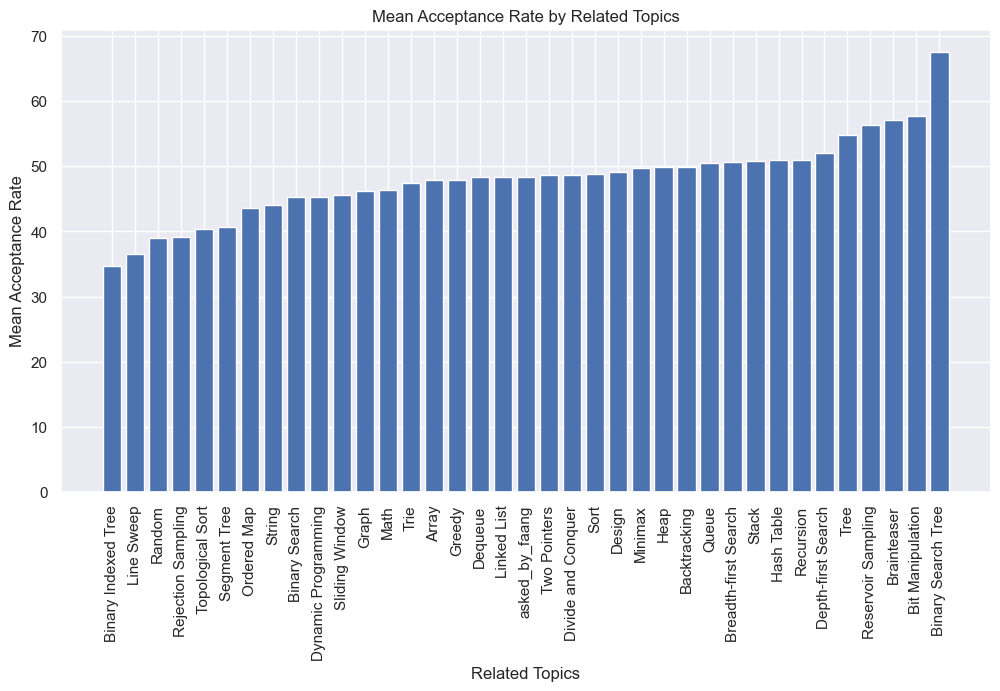

In [219]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the data from a CSV file
data = pd.read_csv('data.csv')


# Split the 'related_topics' column into separate columns
topics_data = data['related_topics'].str.get_dummies(',')

# Concatenate the original data frame and the topics data frame
topics_data = pd.concat([data, topics_data], axis=1)

# Group the data by topics and calculate the mean acceptance rate for each topic
topics_mean = topics_data.groupby(topics_data.columns[:-1].tolist()).mean().reset_index()

# Get a list of unique topics
unique_topics = list(topics_data.columns[:-1])

# Create a new data frame with mean acceptance rates for each unique topic
unique_topics_mean = pd.DataFrame(columns=['related_topics', 'acceptance_rate'])

for topic in unique_topics:
    if topic in topics_mean.columns:
        acceptance_rate = topics_mean.loc[topics_mean[topic] == 1, 'acceptance_rate'].mean()
        unique_topics_mean = pd.concat([unique_topics_mean, pd.DataFrame({'related_topics': [topic], 'acceptance_rate': [acceptance_rate]})], ignore_index=True)

# Sort the topics by mean acceptance rate
unique_topics_mean = unique_topics_mean.sort_values('acceptance_rate')

# Drop the rows with unwanted values in the 'related_topics' column
unwanted_values = ['id', 'is_premium', 'frequency', 'title', 'description', 'difficulty', 'solution_link', 
                   'acceptance_rate', 'url', 'discuss_count', 'accepted', 'submissions', 'companies', 
                   'related_topics', 'likes', 'dislikes', 'rating', 'similar_questions']
unique_topics_mean = unique_topics_mean[~unique_topics_mean['related_topics'].isin(unwanted_values)]

# Sort the topics by mean acceptance rate
unique_topics_mean = unique_topics_mean.sort_values('acceptance_rate')

# Drop rows with NaN values in the 'acceptance_rate' column
unique_topics_mean.dropna(subset=['acceptance_rate'], inplace=True)

# Create a bar plot showing the mean acceptance rate for each unique topic
plt.figure(figsize=(12, 6))
plt.bar(x=unique_topics_mean['related_topics'], height=unique_topics_mean['acceptance_rate'])
plt.xticks(rotation=90)
plt.xlabel('Related Topics')
plt.ylabel('Mean Acceptance Rate')
plt.title('Mean Acceptance Rate by Related Topics')
plt.show()


In [220]:
# Sort the topics by mean acceptance rate
unique_topics_mean = unique_topics_mean.sort_values('acceptance_rate')

# Get the top 5 and bottom 5 topics
top5 = unique_topics_mean.nlargest(5, 'acceptance_rate')
bottom5 = unique_topics_mean.nsmallest(5, 'acceptance_rate')

# Concatenate the top 5 and bottom 5 dataframes
top_bottom = pd.concat([top5, bottom5])

# Create a bar plot showing the mean acceptance rate for each unique topic
plt.figure(figsize=(12, 6))
plt.bar(x=top_bottom['related_topics'], height=top_bottom['acceptance_rate'])
plt.xticks(rotation=90)
plt.xlabel('Related Topics')
plt.ylabel('Mean Acceptance Rate')
plt.title('Top and Bottom 5 Mean Acceptance Rates by Related Topics')
plt.show()

In [221]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

# Read in the data from a CSV file
data = pd.read_csv('data.csv')

# Split the 'related_topics' column into separate columns
topics_data = data['related_topics'].str.get_dummies(',')

# Concatenate the original data frame and the topics data frame
topics_data = pd.concat([data, topics_data], axis=1)

# Split the 'companies' column into separate columns
companies_data = data['companies'].str.get_dummies(',')

# Concatenate the original data frame and the companies data frame
companies_data = pd.concat([data, companies_data], axis=1)

# Group the data by companies and calculate the mean acceptance rate for each company
companies_mean = companies_data.groupby(companies_data.columns[21:].tolist()).mean().reset_index()

# Get a list of unique companies
unique_companies = list(companies_data.columns[21:])

# Create a new data frame with mean acceptance rates for each unique company
unique_companies_mean = pd.DataFrame(columns=['companies', 'acceptance_rate'])

for company in unique_companies:
    if company in companies_mean.columns:
        acceptance_rate = companies_mean.loc[companies_mean[company] == 1, 'acceptance_rate'].mean()
        unique_companies_mean = unique_companies_mean.append({'companies': company, 'acceptance_rate': acceptance_rate}, ignore_index=True)

# Sort the companies by mean acceptance rate
unique_companies_mean = unique_companies_mean.sort_values('acceptance_rate')

# Select the top 10 companies by acceptance rate
top_companies = unique_companies_mean.head(10)

bottom_companies = unique_companies_mean.sort_values(by='acceptance_rate').tail(10)

plt.figure(figsize=(10, 6))
plt.bar(x=top_companies['companies'], height=top_companies['acceptance_rate'])
plt.title('Bottom 10 Companies by Acceptance Rate of Problems')
plt.xlabel('Company')
plt.ylabel('Acceptance Rate of Problems')
plt.xticks(rotation=45, ha='right')
plt.show()

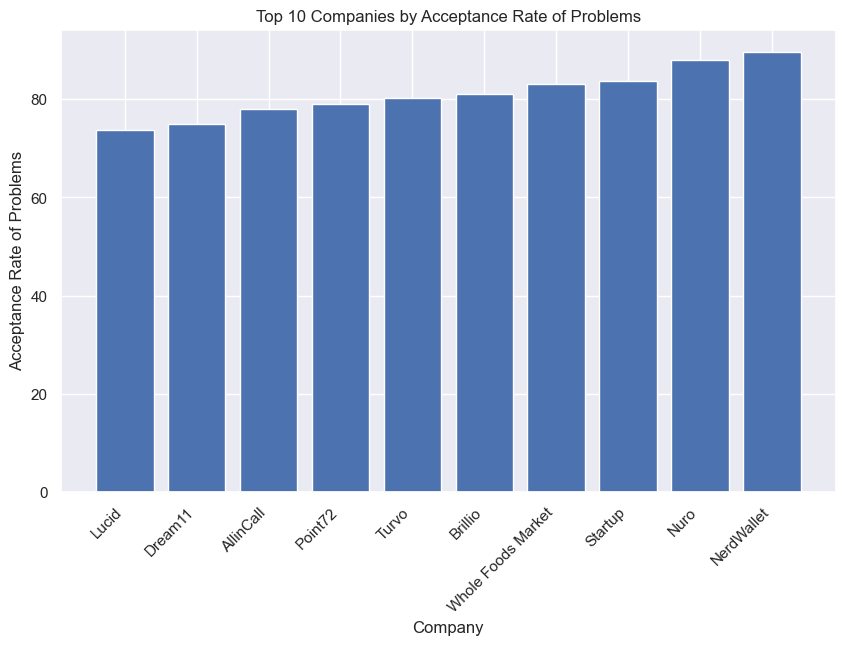

In [222]:
top_companies = unique_companies_mean.sort_values(by='acceptance_rate').head(10)

plt.figure(figsize=(10, 6))
plt.bar(x=bottom_companies['companies'], height=bottom_companies['acceptance_rate'])
plt.title('Top 10 Companies by Acceptance Rate of Problems')
plt.xlabel('Company')
plt.ylabel('Acceptance Rate of Problems')
plt.xticks(rotation=45, ha='right')
plt.show()

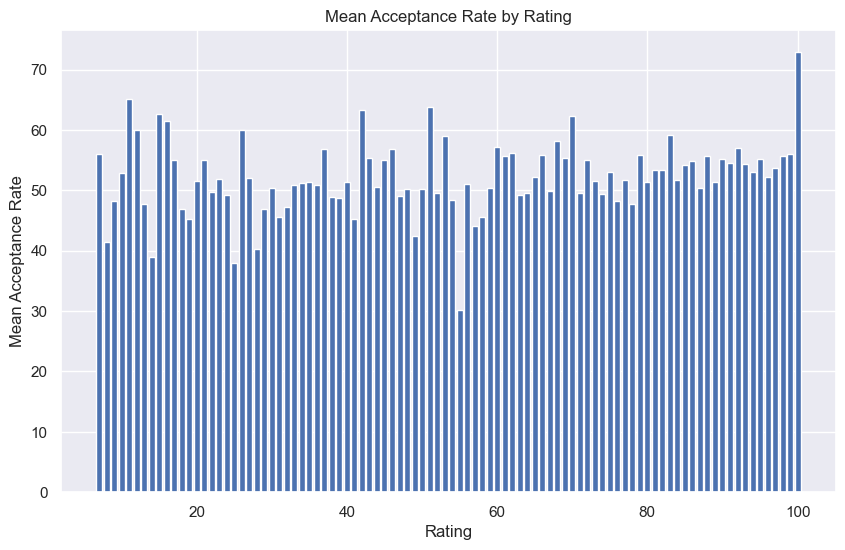

In [223]:
# Group the data by rating and calculate the mean acceptance rate for each rating
rating_mean = data.groupby('rating')['acceptance_rate'].mean().reset_index()

# Plot the mean acceptance rate by rating
plt.figure(figsize=(10, 6))
plt.bar(x=rating_mean['rating'], height=rating_mean['acceptance_rate'])
plt.title('Mean Acceptance Rate by Rating')
plt.xlabel('Rating')
plt.ylabel('Mean Acceptance Rate')
plt.show()


In [226]:
# Filter the rating_mean DataFrame to show only rows with acceptance rate under 35
low_acceptance_rates = rating_mean[rating_mean['acceptance_rate'] < 35]

# Print the rows with low acceptance rates
print(low_acceptance_rates)


    rating  acceptance_rate
48      55            30.15


In [240]:
data = pd.read_csv('data.csv')
(data[data['id'] == 48]).head()

id         title                                        description  \
47  48  Rotate Image  You are given an n x n 2D `matrix` representin...   

    is_premium difficulty           solution_link  acceptance_rate  frequency  \
47           0     Medium  /articles/rotate-image             60.5       69.9   

                                           url  discuss_count accepted  \
47  https://leetcode.com/problems/rotate-image            999   553.5K   

   submissions                                          companies  \
47      915.2K  Amazon,Microsoft,Apple,Uber,Cisco,Facebook,Rub...   

   related_topics  likes  dislikes  rating  asked_by_faang similar_questions  
47          Array   4619       329      93               1               NaN